| Field | Value |
|-|-|
| simulation file | nice_stdp_1.py |
| result files prefix | nice_stdp_1 |
| # result files | 1\*1\*1\*81 = 81 |
| simulation start | 2015-02-12 16:06:45 |
| simulation end | 2015-02-12 16:07:43 |
| duration | 0:00:57 |
| repository | https://github.com/dspicher/py_stdp |
| revision hash | [a0db1f3a6544a0071d969d96d5f2072e517de211](https://github.com/dspicher/py_stdp/tree/a0db1f3a6544a0071d969d96d5f2072e517de211) |

### Results
<font color='grey'>n/a</font>

### Conclusion
<font color='grey'>n/a</font>

In [1]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get(alpha, beta, r_max, delta):
    return cPickle.load(open('stdp_figure_bi_poo_alpha_{0}_beta_{1}_r_max_{2}_delta_{3}.p'.format(alpha, beta, r_max, delta),'rb'))


alpha_s = [-59]
beta_s = [0.5]
r_max_s = [0.15]
delta_s = array([-100.,  -98.,  -96.,  -94.,  -92.,  -90.,  -88.,  -86.,  -84.,
        -82.,  -80.,  -78.,  -76.,  -74.,  -72.,  -70.,  -68.,  -66.,
        -64.,  -62.,  -60.,  -58.,  -56.,  -54.,  -52.,  -50.,  -48.,
        -46.,  -44.,  -42.,  -40.,  -38.,  -36.,  -34.,  -32.,  -30.,
        -28.,  -26.,  -24.,  -22.,  -20.,  -18.,  -16.,  -14.,  -12.,
        -10.,   -8.,   -6.,   -4.,   -2.,    0.,    2.,    4.,    6.,
          8.,   10.,   12.,   14.,   16.,   18.,   20.,   22.,   24.,
         26.,   28.,   30.,   32.,   34.,   36.,   38.,   40.,   42.,
         44.,   46.,   48.,   50.,   52.,   54.,   56.,   58.,   60.,
         62.,   64.,   66.,   68.,   70.,   72.,   74.,   76.,   78.,
         80.,   82.,   84.,   86.,   88.,   90.,   92.,   94.,   96.,
         98.,  100.])


params = list(product(alpha_s, beta_s, r_max_s, delta_s))

data = {tup:get(*tup) for tup in params}

In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
bi_poo = loadtxt('./experimental_data/bi_poo_stdp_points.csv',delimiter=',')
print bi_poo

[[   6.10877753   99.30467939]
 [   2.25490956   87.93651286]
 [   7.62279709   92.34217338]
 [   7.85715393   82.22266999]
 [  -1.61383821   74.67117194]
 [   8.0815909    70.83838368]
 [   5.76654215   55.66966846]
 [   7.00404545   53.45133841]
 [   7.59179751   48.38972674]
 [  17.26986686   42.34356836]
 [  16.89167196   34.12371933]
 [   6.83788769   32.26622441]
 [   7.77903498   32.26250446]
 [   4.93079343   29.11170699]
 [   6.12117736   20.88565804]
 [   7.99851202   20.24582668]
 [  35.59061953   18.23953377]
 [  26.46806268   15.11353597]
 [  77.88272858   10.48343847]
 [  96.02368368    3.45521335]
 [  86.8738472    -3.14893749]
 [  57.95495761  -10.30736085]
 [  27.31745121    3.41057396]
 [   7.85715393    2.22266999]
 [  -2.64798425   22.81755196]
 [  -3.13529767    0.68509075]
 [ -13.84131314   -4.33188152]
 [  -3.8668878   -12.59265   ]
 [  -3.57301176  -15.12345583]
 [  -4.24260272  -20.4963033 ]
 [  -7.39712014  -22.69727359]
 [  -4.65551715  -33.14289257]
 [  -3.7

In [5]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

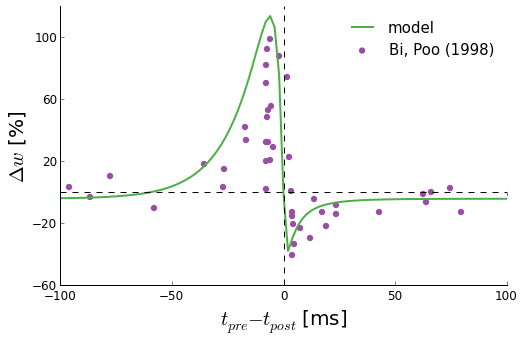

In [6]:
after_spikes = np.arange(2,33,5)
figure(figsize=(8,5))    
dw = zeros(len(delta_s))
for d_idx, delta in enumerate(delta_s):
    p = (alpha_s[0], beta_s[0], r_max_s[0],delta)
    ws = data[p][0].res['weights']
    dw[d_idx] = 100*(ws[-1]-ws[0])/ws[0]
plot(delta_s, dw,'#4daf4a',lw=2)
scatter(-bi_poo[:,0],bi_poo[:,1],lw=0,c='#984ea3',s=40,zorder=-100)
l=legend(['model','Bi, Poo (1998)'],frameon=False,fontsize=15,scatterpoints=1)
plot([-100,100],[0,0],'k--')
plot([0,0],[-60,120],'k--')
xlim([-100,100])
ylim([-60,120])
simpleaxis(gca())
yt,lbls = yticks()
yticks(yt[::2],fontsize=12)
xticks(xticks()[0],fontsize=12)
xlabel('$t_{pre}-t_{post}$ [ms]', fontsize=20)
ylabel('$\Delta w$ [%]',fontsize=20)
savefig('stdp_figure_bi_poo.pdf')